## <span style='color:#4B0082'> A simple annotating program with the ability to reset by pressing 'r' and undo by pressing 'z' </span>

[[(396, 89), (508, 139)], [(396, 138), (508, 189)], [(397, 187), (507, 237)], [(397, 237), (510, 284)], [(398, 285), (508, 330)], [(508, 285), (620, 331)], [(511, 234), (619, 283)], [(397, 333), (510, 380)]]


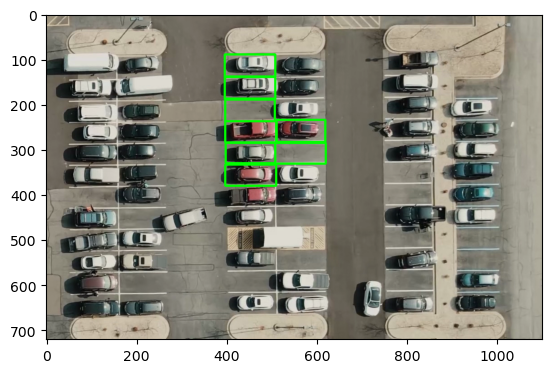

In [4]:
# import the necessary packages
import cv2
import matplotlib.pyplot as plt

# now let's initialize the list of reference point
start_point = (0,0)
points = []
drawing= False

def annotate_image_with_undo(event, x, y, flags, param):
    # grab references to the global variables
    global start_point, points, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        start_point = (x, y)
        drawing = True 
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            temp_image = image.copy()
            cv2.rectangle(temp_image, start_point, (x, y), (120,255,0), 2)
            cv2.imshow("image", temp_image)
    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates and indicate that
        # the cropping operation is finished
        points.append([start_point , (x, y)])

        # draw a rectangle around the region of interest
        cv2.rectangle(image, start_point, (x, y), (0, 255, 0), 3)
        cv2.imshow("image", image)
        drawing = False

        
# load the image, clone it, and setup the mouse callback function
image = cv2.imread('carParkImg.png')
clone = image.copy()
temp_image = image.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image", annotate_image_with_undo)

while True:
    # display the image and wait for a keypress
    if drawing == False:
        cv2.imshow("image", image)
    key = cv2.waitKey(5) & 0xFF

    # press 'r' to reset the window
    if key == ord("r"):
        image = clone.copy()
        points = []
    
    elif key == ord("z"): # with ctrl+z functionality
        image = clone.copy()
        points.pop()
        for p in points:
            cv2.rectangle(image, p[0], p[1], (0, 255, 0), 3)
    # if the 'c' key is pressed, break from the loop
    elif key == 27:
        break

# close all open windows
cv2.destroyAllWindows() 

plt.imshow(image[...,::-1])
print(points)